<a href="https://colab.research.google.com/github/maduSulakshi20/FarmCare/blob/Price-Prediction-(IT19118178)/Crop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FarmCare - Crop Price Prediction (Crop Price Prediction for Next 12 Months)** 

Dataset used : 
1.  Rainfall and temperature (2015 - 2021)

2.  Wholesale price of crops




In [ ]:
import openpyxl
import pandas as pd

Load Rainfall and Temperature data

In [ ]:
# Load the rainfall and temperature data set 
# Give the start raw, and column cells 
start_raw = 5
start_column = 2
num_columns = 17
rainfall_temp_file_path = "//content//Rainfall & Temperature.xlsx"

In [ ]:
# Read data in columns and write to a list
def get_column(sheet_obj, start_raw, column):

    raw_num = start_raw
    lst = []

    while(True):

        cell_obj = sheet_obj.cell(row=raw_num, column=column)
        if cell_obj.value == None:
          break
        lst.append(cell_obj.value)
        raw_num += 1

    return lst

# Read data in raws and write to a list
def get_raw(sheet_obj, start_column, raw, num_columns):

    col_num = start_column
    num_columns += start_column
    lst = []

    while(True):

        cell_obj = sheet_obj.cell(row=raw, column=col_num)
        if num_columns == col_num:
          break
        lst.append(cell_obj.value)
        col_num += 1

    return lst

In [ ]:
# Load the dataset and define the sheet which has data
wb_obj = openpyxl.load_workbook(rainfall_temp_file_path)
sheet_name = wb_obj.sheetnames[1]
sheet_obj = wb_obj[sheet_name]

In [ ]:
#Read column values in the excel
title_lst = get_column(sheet_obj, start_raw, start_column)

In [ ]:
# Create a list of values in the column titles and the array
temp_data = dict()
rain_data = dict()
district = ''
districts = []

for i, item in enumerate(title_lst):
  if i%14 == 0: 
    district = item.strip().lower()
    districts.append(district)
    rain_data[district] = []
    temp_data[district] = []
  elif (i-1)%14 != 0:
    rain_data[district].append(get_raw(sheet_obj, start_column+2, i+start_raw, 7))
    temp_data[district].append(get_raw(sheet_obj, start_column+10, i+start_raw, 7))

print(districts)


['colombo', 'jaffna', 'trincomalee', 'hambantota', 'ratnapura', 'anuradhapura', 'katugastota', 'bandarawela', 'nuwara eliya', 'kurunegala', 'puttalam', 'galle', 'badulla', 'mannar', 'vavuniya', 'mahailluppallama', 'batticaloa', 'katunayake', 'ratmalana', 'potuvil', 'monaragala', 'polonnaruwa', 'mattala']


In [ ]:
# Read rainfall data to find if there is a 0 or null value
# If 0 or null add average value to those cells
for district in districts:
  for i, lst in enumerate(rain_data[district]):
    avg = 0
    num_items = 0
    for j, item in enumerate(lst):
      val = 0
      try: 
        val = float(item)
        num_items += 1
      except: pass
      avg += val
    avg /= num_items
    for j, item in enumerate(lst):
      try: float(item)
      except: rain_data[district][i][j] = round(avg, 2)

# Read temperature data to find if there is a 0 or null value
# If 0 or null add average value to those cells

for district in districts:
  for i, lst in enumerate(temp_data[district]):
    avg = 0
    num_items = 0
    for j, item in enumerate(lst):
      val = 0
      try: 
        val = float(item)
        num_items += 1
      except: pass
      avg += val
    avg /= num_items
    for j, item in enumerate(lst):
      try: float(item)
      except: temp_data[district][i][j] = round(avg, 2)


In [ ]:
# Display the rain data list in Colombo (2015 - 2020 monthly wise)
rain_data['colombo']

[[32.7, 65.3, 82.7, 45.7, 15.4, 115.6, 148],
 [122.5, 106.7, 92.3, 108.8, 157, 0.1, 35],
 [220.9, 91.3, 133.8, 68.8, 41.4, 41.3, 161],
 [267.7, 185.9, 81.2, 265, 193.8, 212.5, 209],
 [169.2, 752.4, 343.4, 421.7, 126.9, 200.2, 246],
 [237.8, 132.3, 141.5, 155.8, 257.2, 111.9, 127],
 [37.3, 49.2, 47.2, 68.9, 136.1, 196.1, 142],
 [90.7, 1.1, 70.3, 63.9, 288.4, 97.5, 120],
 [631.4, 29, 355.2, 263.7, 609.8, 517.7, 139],
 [235.4, 374, 467.1, 539.7, 354.9, 125.6, 240],
 [525.8, 404.8, 294.2, 420.7, 433.6, 143.6, 417],
 [376.6, 165.1, 172.3, 139.5, 250.3, 321.6, 76]]

In [ ]:
# Display the temperature data list in Colombo (2015 - 2020 monthly wise)
temp_data['colombo']

[[27.4, 28.3, 27.1, 27, 27.7, 28.25, 27.35],
 [25.7, 28.7, 27.4, 27.8, 28.4, 29.15, 28.05],
 [28.1, 29.5, 28.1, 28.5, 28.8, 29.4, 28],
 [28.4, 29.9, 29.8, 28.6, 29.3, 29.25, 28.7],
 [29.2, 28.7, 29.2, 28.3, 29.4, 29.3, 28.7],
 [28.6, 29, 28.6, 28.4, 28.8, 28.95, 28.65],
 [29, 28.5, 29, 28.3, 28.7, 28.35, 28.3],
 [29, 29.1, 28.6, 27.8, 27.9, 28.5, 28],
 [27.9, 28.6, 28.1, 28.3, 27.4, 27.6, 28.15],
 [27.8, 28.4, 27.8, 27.5, 27, 28.4, 27.8],
 [27.6, 27.5, 27.3, 27.4, 27.6, 28.15, 27.05],
 [27.9, 27.8, 27.5, 27.5, 27.7, 27.65, 27.85]]

In [ ]:
# Load the wholesale prices of crops data set 
# Give the start raw, and column cells 
start_raw = 5
year_column = 2
num_columns = 15
crop_price_file_path = "//content//Wholesale Prices of Selected Food Crops 2015-2021.xlsx"

In [ ]:
# initialize file paths and  excel sheet number
wb_obj = openpyxl.load_workbook(crop_price_file_path)
sheet_name = wb_obj.sheetnames[0]
sheet_obj = wb_obj[sheet_name]

In [ ]:
sheet_name

'Sheet1'

In [ ]:
#Read the column names
table_col_names = get_raw(sheet_obj, year_column, 4, num_columns)

In [ ]:
years = get_column(sheet_obj, start_raw, year_column)

In [ ]:
#Read data from excel sheet and append them
data = []
for i in range(start_raw, len(years) + start_raw):
  data.append(get_raw(sheet_obj, year_column, i, num_columns))

In [ ]:
#Check data in correct range and if the values are 
data_new = []
for i in data:
  if i[0] < 2015 and i[0] > 2021:
    continue
  if i[2] is None:
    continue
  
  i[1] = i[1].lower()
  i[2] = i[2].lower()
  
  appendable = True
  for j in range(3, num_columns):
    p = 0
    try:
      p = float(i[j])
    except:
      appendable = False
      break
    if p < 30:
      appendable = False
      break
  
  if appendable:
    data_new.append(i)

In [ ]:
data_new

[[2015,
  'colombo',
  'samba 1',
  92.025,
  91.586,
  91.869,
  88.95,
  89.7078,
  89.69,
  89.2408,
  89.0864,
  92.2182,
  93.7304,
  96.4162,
  97],
 [2015,
  'colombo',
  'samba 2',
  86.85,
  84.07260000000001,
  83.4912,
  80.9008,
  81.3886,
  80.8116,
  80.658,
  82.17,
  84.5254,
  85.84100000000001,
  89.61040000000001,
  91.4208],
 [2015,
  'colombo',
  'imported samba',
  71.4978,
  76.2906,
  77.9438,
  82.5536,
  91.3828,
  93.1786,
  92.6516,
  100.55680000000001,
  108.1314,
  107.90280000000001,
  111.405,
  106.553],
 [2015,
  'colombo',
  'nadu 1',
  82.575,
  77.699,
  74.2004,
  70.19,
  69.4636,
  69.185,
  66.34779999999999,
  63.929399999999994,
  67.6072,
  70.33539999999999,
  74.387,
  74.525],
 [2015,
  'colombo',
  'nadu 2',
  78.5878,
  71.5792,
  70.095,
  66.3078,
  66.4572,
  66.24600000000001,
  61.953,
  59.936400000000006,
  63.644,
  65.2168,
  70.0908,
  71.1324],
 [2015,
  'colombo',
  'raw (red)',
  86.33760000000001,
  73.86399999999999,
  71

In [ ]:
len(data_new)

710

In [ ]:
#Append data to the item dictionary
items = []
item_vals = []
for i in data_new:
  if i[2] not in items:
    items.append(i[2])
    item_vals.append([])

items_dict = dict(zip(items, item_vals))

for i in data_new:
    items_dict[i[2]].append(i)

In [ ]:
#Give indexes to the months
months = {'jan':0, 'feb':1, 'mar':2, 'apr':3, 'may':4, 'jun':5, 'jul':6, 
          'aug':7, 'sep':8, 'oct':9, 'nov':10, 'dec':11}

In [ ]:
#Combine data and create one table
main_table = pd.DataFrame(columns=['year', 'item', 'district', 'month', 'temperature', 'rain','price'])

for item_name in items_dict:
  for lst in items_dict[item_name]:
    year = lst[0]
    district = lst[1]
    for i in range(3, 15):
      district = district.strip().lower()
      month = table_col_names[i].strip().lower()
      year = int(year)
      if district in districts:
        temperature = temp_data[district][months[month]][year-2015]
        rain = rain_data[district][months[month]][year-2015]
        df_raw = {'year': year, 'item':item_name.strip().lower(), 'district': district, 'month':month, 
                  'temperature': temperature, 'rain': rain, 'price':lst[i]}
        main_table = main_table.append(df_raw, ignore_index = True)

In [ ]:
main_table

,year,item,district,month,temperature,rain,price
0,2015,samba 1,colombo,jan,27.40,32.7,92.025000
1,2015,samba 1,colombo,feb,25.70,122.5,91.586000
2,2015,samba 1,colombo,mar,28.10,220.9,91.869000
3,2015,samba 1,colombo,apr,28.40,267.7,88.950000
4,2015,samba 1,colombo,may,29.20,169.2,89.707800
...,...,...,...,...,...,...,...
3043,2021,dried chillies,mannar,aug,28.70,2.0,536.666667
3044,2021,dried chillies,mannar,sep,28.75,84.0,559.333333
3045,2021,dried chillies,mannar,oct,28.10,332.0,561.500000
3046,2021,dried chillies,mannar,nov,27.20,654.0,558.400000


In [ ]:
main_table.iloc[:, 0].unique()

array([2015, 2016, 2017, 2018, 2019, 2021], dtype=object)

In [ ]:
main_table.iloc[:, 1].unique()

array(['samba 1', 'samba 2', 'imported samba', 'nadu 1', 'nadu 2',
       'raw (red)', 'raw (white)', 'dried chillies imported',
       'red onion imported', 'red onions sinnan', 'big onions imported',
       "potatoes n'eliya", 'imported potato', 'red dhal', 'green beans',
       'carrot', 'tomatoes', 'green chillies', 'lime', 'coconut large',
       'coconut small', 'kolikuttu', 'seeni', 'papaw', 'cabbage',
       'brinjals', 'pumpkin', 'snake gourd', 'ambul',
       'red onions vedalan', 'potatoes welimada', 'potatoes imported',
       'dried chillies'], dtype=object)

In [ ]:
main_table.iloc[:, 2].unique()

array(['colombo', 'puttalam', 'badulla', 'vavuniya', 'mannar', 'jaffna',
       'galle', 'kurunegala', 'batticaloa', 'polonnaruwa', 'trincomalee',
       'nuwara eliya'], dtype=object)

In [ ]:
main_table.iloc[:, 3].unique()

array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'], dtype=object)

### Write created table to a new excel

In [ ]:
with pd.ExcelWriter('output.xlsx') as writer:
  main_table.to_excel(writer, sheet_name='data', index=False)

In [ ]:
dataset = pd.read_excel('/content/output.xlsx', sheet_name = 'data')

In [ ]:
dataset

,year,item,district,month,temperature,rain,price
0,2015,samba 1,colombo,jan,27.40,32.7,92.025000
1,2015,samba 1,colombo,feb,25.70,122.5,91.586000
2,2015,samba 1,colombo,mar,28.10,220.9,91.869000
3,2015,samba 1,colombo,apr,28.40,267.7,88.950000
4,2015,samba 1,colombo,may,29.20,169.2,89.707800
...,...,...,...,...,...,...,...
3043,2021,dried chillies,mannar,aug,28.70,2.0,536.666667
3044,2021,dried chillies,mannar,sep,28.75,84.0,559.333333
3045,2021,dried chillies,mannar,oct,28.10,332.0,561.500000
3046,2021,dried chillies,mannar,nov,27.20,654.0,558.400000


Data pre-processing

In [ ]:
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x[:, 0] = le.fit_transform(x[:, 0])
items = le.classes_

In [ ]:
items_dir = dict()
for i, itm in enumerate(items):
  items_dir[itm] = i

items_dir

{'ambul': 0,
 'big onions imported': 1,
 'brinjals': 2,
 'cabbage': 3,
 'carrot': 4,
 'coconut large': 5,
 'coconut small': 6,
 'dried chillies': 7,
 'dried chillies imported': 8,
 'green beans': 9,
 'green chillies': 10,
 'imported potato': 11,
 'imported samba': 12,
 'kolikuttu': 13,
 'lime': 14,
 'nadu 1': 15,
 'nadu 2': 16,
 'papaw': 17,
 'potatoes imported': 18,
 "potatoes n'eliya": 19,
 'potatoes welimada': 20,
 'pumpkin': 21,
 'raw (red)': 22,
 'raw (white)': 23,
 'red dhal': 24,
 'red onion imported': 25,
 'red onions sinnan': 26,
 'red onions vedalan': 27,
 'samba 1': 28,
 'samba 2': 29,
 'seeni': 30,
 'snake gourd': 31,
 'tomatoes': 32}

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1, 2])], remainder='passthrough')
x = ct.fit_transform(x)

In [ ]:
ct.get_feature_names_out()

array(['encoder__x0_0', 'encoder__x0_1', 'encoder__x0_2', 'encoder__x0_3',
       'encoder__x0_4', 'encoder__x0_5', 'encoder__x0_6', 'encoder__x0_7',
       'encoder__x0_8', 'encoder__x0_9', 'encoder__x0_10',
       'encoder__x0_11', 'encoder__x0_12', 'encoder__x0_13',
       'encoder__x0_14', 'encoder__x0_15', 'encoder__x0_16',
       'encoder__x0_17', 'encoder__x0_18', 'encoder__x0_19',
       'encoder__x0_20', 'encoder__x0_21', 'encoder__x0_22',
       'encoder__x0_23', 'encoder__x0_24', 'encoder__x0_25',
       'encoder__x0_26', 'encoder__x0_27', 'encoder__x0_28',
       'encoder__x0_29', 'encoder__x0_30', 'encoder__x0_31',
       'encoder__x0_32', 'encoder__x1_badulla', 'encoder__x1_batticaloa',
       'encoder__x1_colombo', 'encoder__x1_galle', 'encoder__x1_jaffna',
       'encoder__x1_kurunegala', 'encoder__x1_mannar',
       'encoder__x1_nuwara eliya', 'encoder__x1_polonnaruwa',
       'encoder__x1_puttalam', 'encoder__x1_trincomalee',
       'encoder__x1_vavuniya', 'encoder__x

In [ ]:
x = x.toarray()

In [ ]:
x[0, :]

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. , 27.4, 32.7])

In [ ]:
ct.transform([[items_dir['samba 1'],	'colombo',	'jan', 27.4, 32.7]]).toarray()

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. , 27.4, 32.7]])

In [ ]:
x

array([[  0. ,   0. ,   0. , ...,   0. ,  27.4,  32.7],
       [  0. ,   0. ,   0. , ...,   0. ,  25.7, 122.5],
       [  0. ,   0. ,   0. , ...,   0. ,  28.1, 220.9],
       ...,
       [  0. ,   0. ,   0. , ...,   0. ,  28.1, 332. ],
       [  0. ,   0. ,   0. , ...,   0. ,  27.2, 654. ],
       [  0. ,   0. ,   0. , ...,   0. ,  27.4,  85. ]])

In [ ]:
y

array([ 92.025,  91.586,  91.869, ..., 561.5  , 558.4  , 666.75 ])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

# Train model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 60, random_state =42)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=60, random_state=42)

In [ ]:
test_data_1 = [[items_dir['dried chillies'], 'mannar', 'dec', 27.4, 32.7]]
test_data_2 = [[items_dir['samba 1'], 'colombo', 'jan', 27.4, 32.7]]
test_data_3 = [[items_dir['samba 1'],	'colombo', 'may', 29.20, 169.2]]
regressor.predict(ct.transform(test_data_1).toarray())

array([599.38933333])

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
y_pred

array([149.7885753 ,  72.22682833,  93.69033845,  80.61981944,
        69.24372222, 307.30966617, 249.36059722,  83.88672222,
       163.21590278, 152.47358333,  67.77171778,  75.89445056,
        58.14665278, 155.68563151,  85.4485363 ,  85.26841667,
       157.93965   ,  97.98711968, 160.97788889, 107.8824213 ,
        67.7047963 ,  71.86383796, 200.85347222,  74.89075861,
       190.9331315 , 148.76719444,  74.89075861,  78.01211389,
        69.26554861,  82.98718518,  75.51568611,  72.21559722,
       308.22587434, 132.42963889,  73.90623148,  75.74843056,
        72.97491889,  93.94945361,  84.7292963 ,  65.56922222,
        75.23686111,  71.44098611,  80.70045333,  74.10180704,
        68.63458333, 102.89852778, 192.94049778,  83.21766667,
       110.72055556,  66.24119444, 111.441     ,  91.87237778,
        75.32329259, 413.48777778,  99.52279889, 210.045225  ,
       126.29926944, 157.63455556,  79.69254167, 120.89816944,
       156.30392593, 150.06922133,  75.91523611, 139.33

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6531128376817393

ValueError: ignored

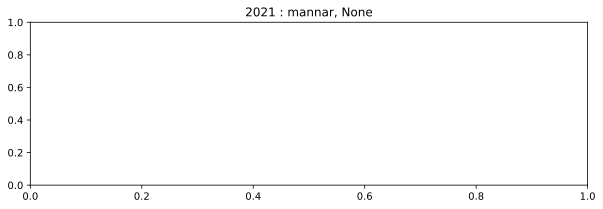